### RNN-Stock-Forecasting with yFinance-Exercise 4 - Timothy Gregorian

### Import/Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [3]:
ticker = 'NVDA'
data = yf.download(ticker, start='2019-01-01', end='2025-01-01')
data = data['Close'].values.reshape(-1, 1)

C:\Users\Timothy\AppData\Local\Temp\ipykernel_1228\240777738.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2019-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [5]:
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [6]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [7]:
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

d:\5. Semester\Deep Learning\DL-projects\venv312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.fit(X_train, y_train, epochs=20, batch_size=64)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0105
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.3249e-04
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.1251e-04
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.3903e-04
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.1707e-04
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.6137e-05
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.0002e-04
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0526e-04
Epoch 9/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.7199e-05
Epoch 10/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.9044e-05
Epoch 11/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.3766e-05
Epoch 12/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.9716e-05
Epoch 13/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.8780e-05
Epoch 14/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.7245e-05
Epoch 15/20
19/19 ━

In [9]:
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

mse = mean_squared_error(y_test_unscaled, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_unscaled, predictions)

print(f"Unscaled Mean Squared Error (MSE): {mse}")
print(f"Unscaled Root Mean Squared Error (RMSE): {rmse}")
print(f"Unscaled Mean Absolute Error (MAE): {mae}")

Unscaled Mean Squared Error (MSE): 360.26746938924816
Unscaled Root Mean Squared Error (RMSE): 18.98071308958776
Unscaled Mean Absolute Error (MAE): 15.346550921736092


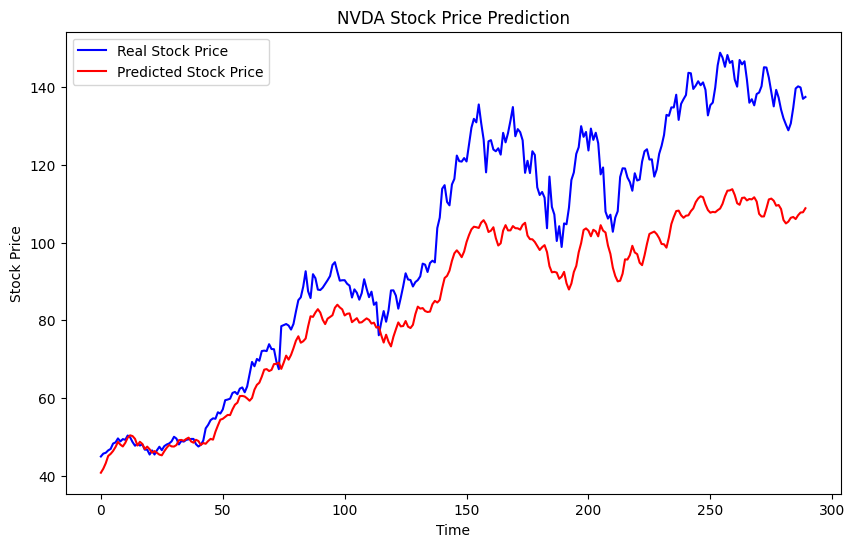

In [10]:
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), color='blue', label='Real Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()